In [1]:
import pyaudio
import numpy
import wave     #wavファイルを扱うためのライブラリ
import datetime



Now Recording...
Finished Recording.


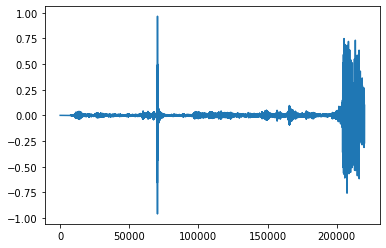

In [17]:
import pyaudio
import numpy
import matplotlib.pyplot as plt
import wave

chunk = 1024
FORMAT = pyaudio.paInt16

CHANNELS = 1 #モノラル（2にするとステレオ）
RATE = 44100 #サンプルレート（録音の音質）
RECORD_SECONDS = 5 #録音時間

p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                frames_per_buffer = chunk)

#レコード開始
print("Now Recording...")
all = []
for i in range(0, int(RATE / chunk * RECORD_SECONDS)):
    data = stream.read(chunk) #音声を読み取って、
    all.append(data) #データを追加

#レコード終了
print("Finished Recording.")

stream.close()
p.terminate()

#data = ''.join(all) #Python2用
data = b"".join(all) #Python3用

#録音したデータを配列に変換
result = numpy.frombuffer(data,dtype="int16") / float(2**15)

plt.plot(result)
plt.show()

In [18]:
import pandas as pd

In [19]:
sound = pd.DataFrame(result)

In [20]:
sound.to_csv("result3.csv", encoding="shift_jis")

In [9]:
sound.tail()

,0
220155,-0.002655
220156,-0.002686
220157,-0.002686
220158,-0.002686
220159,-0.002716


In [10]:
sound["time"] = range(0,len(sound)) #x軸用に、時間軸を作成

In [12]:
sound["time"] = sound['time']*(RECORD_SECONDS/(len(sound)-1))

In [13]:
sound.tail()

,0,time
220155,-0.002655,4.999909
220156,-0.002686,4.999932
220157,-0.002686,4.999955
220158,-0.002686,4.999977
220159,-0.002716,5.000000


In [14]:
from scipy.signal import find_peaks

In [26]:
sound_new = sound.rename(columns={0: 'Amplitude'})

In [27]:
sound_new.head()

,Amplitude,time
0,0.000000,0.000000
1,0.000000,0.000023
2,-0.000031,0.000045
3,0.000000,0.000068
4,0.000000,0.000091


In [28]:
sound_new.loc[sound_new['Amplitude'].idxmax()]

Amplitude    0.031219
time         3.935792
Name: 173300, dtype: float64

In [29]:
a = sound_new.loc[sound_new['Amplitude'].idxmax()]
#　Amplitudeの最大値のデータを取得

In [30]:
a

Amplitude    0.031219
time         3.935792
Name: 173300, dtype: float64

In [32]:
a['time']
#　Amplitudeの最大値のデータから、timeのデータのみ抽出

2.935791859519711

In [55]:
sound_new_over_maxtime = sound_new[sound_new['time'] > (a['time']-0.2)]
# ピーク値ー0.2s以上でデータを切り出し

In [56]:
sound_new_over_maxtime

,Amplitude,time
164494,0.001038,3.735800
164495,0.001099,3.735823
164496,0.001129,3.735845
164497,0.001160,3.735868
164498,0.001068,3.735891
...,...,...
220155,-0.002655,4.999909
220156,-0.002686,4.999932
220157,-0.002686,4.999955
220158,-0.002686,4.999977


In [57]:
sound_new_time_1s = sound_new_over_maxtime[0:44100]
#ピーク値ー0.2s　～　1s後まででデータ切り出し（sampling rate = 44.1kHz 1s = 44.1k）

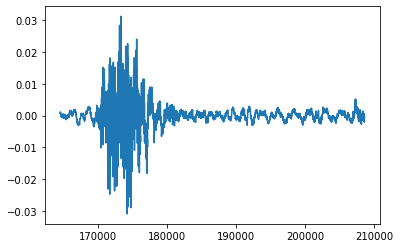

In [58]:
plt.plot(sound_new_time_1s['Amplitude'])
#グラフ描写テスト

In [59]:
sound_new_time_1s

,Amplitude,time
164494,0.001038,3.735800
164495,0.001099,3.735823
164496,0.001129,3.735845
164497,0.001160,3.735868
164498,0.001068,3.735891
...,...,...
208589,-0.000458,4.737235
208590,-0.000366,4.737258
208591,-0.000366,4.737281
208592,-0.000336,4.737303
